function as an arg (solve_ivp)

investigate default values

use of kwargs (large option set)

function as a return value (dense_output)

function as an arg 2 (events). + Higher-order : optional level 

function factory (modèle à compartiment)

In [591]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [592]:
WEEK = 7
YEAR = 365

In [593]:
N = 100
beta = 1 / (WEEK)
gamma = 1 / (2 * WEEK)
omega = 1 / YEAR

In [594]:
def dSIR(t, SIR):
    S, I, R = SIR
    dS = omega * R - beta * I * S / N
    dI = beta * I * S / N - gamma * I
    dR = gamma * I - omega * R  
    return (dS, dI, dR)

In [595]:
S0, I0 = 99.0, 1.0
R0 = N - S0 - I0
t_span = [0.0, 5*YEAR]

In [596]:
results = solve_ivp(dSIR, t_span=t_span, y0=(S0, I0, R0))

In [597]:
list(results.keys())

['t',
 'y',
 'sol',
 't_events',
 'y_events',
 'nfev',
 'njev',
 'nlu',
 'status',
 'message',
 'success']

In [598]:
def plot(t, y):
    pass

In [599]:
# plot(**results)

In [600]:
def plot(t, y, **_):
    print(list(_.keys()))

plot(**results)

['sol', 't_events', 'y_events', 'nfev', 'njev', 'nlu', 'status', 'message', 'success']


In [601]:
def plot(t, y, **_):
    plt.plot(t, y.T, "-+", label=["S", "I", "R"])
    plt.xlabel("Temps (années)")
    plt.xticks(arange(0, 5*YEAR+1, YEAR), [str(i) for i in range(5+1)])
    plt.ylabel("Populations (%)")
    plt.yticks(arange(0, 101, 10))
    plt.axis([0, 5*YEAR, 0, 100])
    plt.legend()
    plt.grid(True)

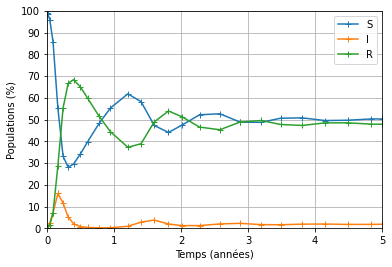

In [602]:
plot(**results)
plt.savefig("images/SIR-discrete.svg")

In [603]:
options = eval(open("options.py").read())
options

{'method': 'Radau', 'rtol': 0.001, 'atol': 1e-06}

In [604]:
results = solve_ivp(dSIR, t_span=t_span, y0=(S0, I0, R0), **options)

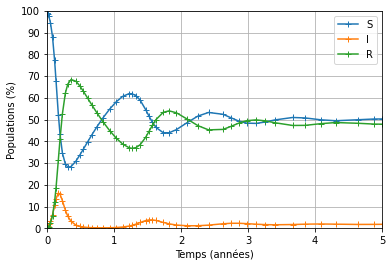

In [605]:
plot(**results)
plt.savefig("images/SIR-options.svg")

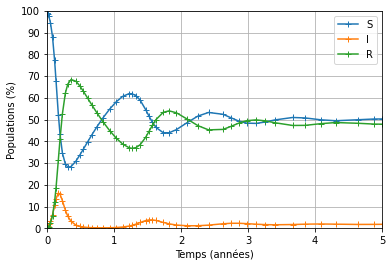

In [606]:
plot(**results)
plt.savefig("images/SIR-options.svg")

-----

In [607]:
t_eval = arange(0.0, 5*YEAR, 30)

In [608]:
results = solve_ivp(dSIR, t_span=t_span, t_eval=t_eval, y0=(S0, I0, R0))
t, y = results.t, results.y

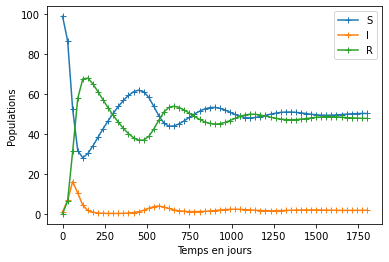

In [609]:
plt.plot(t, y.T, "-+", label=["S", "I", "R"])
plt.xlabel("Temps en jours")
plt.ylabel("Populations")
plt.legend()
pass

In [610]:
t = arange(0.0, 5*YEAR, 1)
dense_output = True
t

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.822e+03, 1.823e+03,
       1.824e+03])

In [611]:
results = solve_ivp(dSIR, t_span=t_span, dense_output=dense_output, y0=(S0, I0, R0))
tc, yc, sol = results["t"], results["y"], results["sol"]
tc

array([0.00000000e+00, 1.97889932e-02, 2.17678925e-01, 2.19657825e+00,
       1.32416117e+01, 3.09781423e+01, 5.76399344e+01, 8.58954236e+01,
       1.13590062e+02, 1.42736111e+02, 1.80755929e+02, 2.20356830e+02,
       2.82216227e+02, 3.44075623e+02, 4.39108645e+02, 5.10936964e+02,
       5.82765284e+02, 6.60372167e+02, 7.34382420e+02, 8.29519971e+02,
       9.40534397e+02, 1.05148669e+03, 1.16666765e+03, 1.27137897e+03,
       1.39000375e+03, 1.51236535e+03, 1.63811822e+03, 1.76702013e+03,
       1.82500000e+03])

In [612]:
sol

In [613]:
callable(sol)

True

In [614]:
def plot(t_, sol, **_):
    plt.plot(t_, sol(t_).T, "-", label=["S", "I", "R"])
    plt.xlabel("Temps (années)")
    plt.xticks(arange(0, 5*YEAR+1, YEAR), [str(i) for i in range(5+1)])
    plt.ylabel("Populations (%)")
    plt.yticks(arange(0, 101, 10))
    plt.axis([0, 5*YEAR, 0, 100])
    plt.legend()
    plt.grid(True)

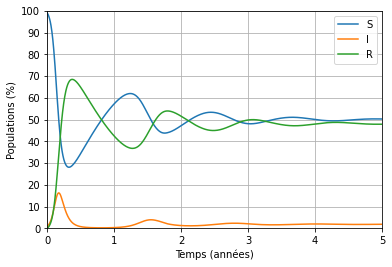

In [615]:
plot(arange(0, 5*YEAR), **results)
plt.savefig("images/SIR-dense.svg")

In [616]:
def event(t, SIR):
    S, I, R = SIR
    return I - 10.0

In [617]:
results = solve_ivp(dSIR, y0=(S0, I0, R0), t_span=t_span, dense_output=True, events=[event])

In [618]:
def plot(t_, sol, t_events, **_):
    plt.plot(t_, sol(t_).T, "-", label=["S", "I", "R"])
    t_event = t_events[0]
    plt.plot(t_event, sol(t_event)[1], "k.")
    plt.xlabel("Temps (années)")
    plt.xticks(arange(0, 5*YEAR+1, YEAR), [str(i) for i in range(5+1)])
    plt.ylabel("Populations (%)")
    plt.yticks(arange(0, 101, 10))
    plt.axis([0, 5*YEAR, 0, 100])
    plt.legend()
    plt.grid(True)

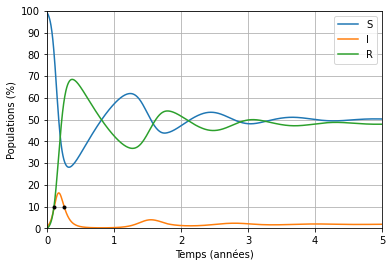

In [619]:
plot(t, **results)
savefig("images/SIR-events.svg")

In [620]:
I_max = 2.0

def event(t, SIR):
    S, I, R = SIR
    return I - I_max

In [621]:
results = solve_ivp(dSIR, y0=(S0, I0, R0), t_span=t_span, dense_output=True, events=[event])

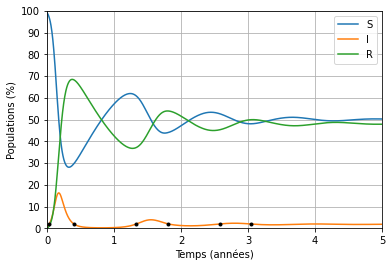

In [622]:
plot(t, **results)
savefig("images/SIR-events-2.svg")

In [623]:
def I_crosses(I_threshold):
    def event(t, SIR):
        S, I, R = SIR
        return I - I_threshold
    return event

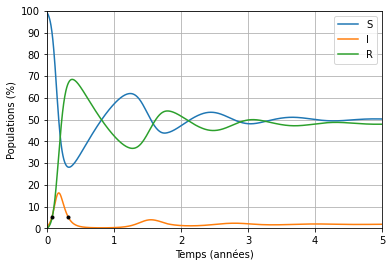

In [624]:
results = solve_ivp(dSIR, y0=(S0, I0, R0), t_span=t_span, dense_output=True, events=[I_crosses(2.0)])
plot(t, **results)
#savefig("images/SIR-events-2bis.svg")

In [625]:
t_events

[array([  10.08788975,  144.86307843,  485.67789385,  658.51899932,
         939.49713924, 1107.92998912])]

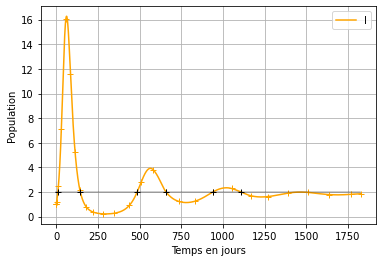

In [626]:
plt.plot(t, sol(t).T[:,1], "-", color="orange", label="I")
plt.plot(tc, yc.T[:, 1], "+", color="orange")
plt.plot([t[0], t[-1]], [2.0, 2.0], "k", alpha=0.25)
plt.plot(t_events[0], 2.0 * ones_like(t_events[0]), "k+")
plt.xlabel("Temps en jours")
plt.ylabel("Population")
plt.grid(True)
plt.legend()
pass

In [627]:
SIR_dynamics = {
 ("S", "I"): "beta * I * S / N",
 ("I", "R"): "gamma * I",
 ("R", "S"): "omega * R"
}

In [628]:
def get_vars(dynamics):
    vars = []
    for pair in dynamics.keys():
        vars.extend(pair)
    # remove duplicated vars
    return list(set(vars))

def make_fun(dynamics):
    vars = get_vars(dynamics)
    n = len(vars)
    
    def fun(t, state):
        ns = globals().copy()
        for var, value in zip(vars, state):
            ns[var] = value
        dstate = []
        for i in range(n):
            d = 0
            var = vars[i]
            for (edge, expr) in dynamics.items():
                source, target = edge
                if source == var:
                    d -= eval(expr, ns)
                if target == var:
                    d += eval(expr, ns)
            dstate.append(d)
        return dstate
        
    return fun 

In [629]:
dSIR2 = make_fun(SIR_dynamics)

In [630]:
dSIR(None, (1/3, 1/3, 1/3))

(0.0007545118504022613, -0.023650793650793648, 0.02289628180039139)

In [631]:
dSIR2(None, (1/3, 1/3, 1/3))

[0.0007545118504022613, -0.023650793650793648, 0.02289628180039139]